In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("flight.csv")
df.shape

(62988, 23)

## Data Dictionary
1. member_no : ID Member
2. ffp_date : Frequent Flyer Program Join Date
3. first_flight_date : Frist Flight Date
4. gender : Gender
5. ffp_tier : Tier of Frequent Flyer Program
6. work_city : City
7. work_province : Province
8. work_country : Country
9. age : Customer Age
10. load_time : The date data was retrieved
11. flight_count : Customer flight count
12. bp_sum : Flight plan
13. sum_yr_1 : Fare revenue
14. sum_yr_2 : Votes prices
15. seg_km_sum : Total disctance (km) traveled
16. last_flight_date : Last flight date
17. last_to_end : Distance of the last flight to the last airline company
18. avg_interval : Averange time distance
19. max_interval : Maximum time intervals
20. exchange_count :Exchange amount
21. avg_discount : Averange discount
22. points_sum : Customer point
23. point_notflight : Not used customer point

### Assignment 1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

The data above shows that there are several columns that have different numbers. For example, the GENDER column has 62985 non-null values, while the WORK_CITY column has 60719 non-null values, and the WORK_PROVINCE column has 59740 non-null values. This difference in the number of non-nulls indicates that there are missing values or values that do not exist in the dataset. So, it is necessary to handle missing values in these columns so that data analysis can be carried out more accurately. Apart from that, several columns such as AGE, SUM_YR_1, and SUM_YR_2 also have non-null values that are less than the total number of rows, which indicates that there are missing values in these columns that need attention.

In [4]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
59455,21594,5/24/2010,6/19/2010,Male,4,shanghai,shanghai,CN,46.0,3/31/2014,...,352.0,2261,11/11/2013,142,367.000000,367,0,0.598001,810,0
28562,9268,10/31/2011,4/13/2013,Female,4,guangzhou,guangdong,CN,37.0,3/31/2014,...,8222.0,10186,2/28/2014,33,35.666667,119,0,0.785502,9052,7
21201,44158,12/28/2012,12/29/2012,Male,4,shenyang,liaoning,CN,40.0,3/31/2014,...,12988.0,15329,2/16/2014,45,37.636364,123,0,0.751716,7037,0
24546,52497,1/28/2013,1/28/2013,Male,4,foshan,guangdong,CN,43.0,3/31/2014,...,8857.0,15827,10/23/2013,161,19.142857,66,0,0.616411,7586,0
25182,45953,9/28/2006,9/28/2006,Female,4,shanghai,shanghai,CN,48.0,3/31/2014,...,0.0,10766,8/14/2012,596,21.750000,78,0,0.877415,9480,0


### Assignment 2 : EDA 

In [5]:
numerical_cols = df.select_dtypes(exclude = 'object')
categorical_cols = df.select_dtypes(include = 'object')
date = df.select_dtypes(include = 'datetime')

In [6]:
numerical_cols

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,28065,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,55106,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,21189,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,39546,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,4,25.0,2,0,0.0,0.0,1134,297,4.000000,4,1,0.000000,12318,22
62984,36041,4,38.0,4,0,0.0,0.0,8016,89,37.000000,60,14,0.000000,106972,43
62985,45690,4,43.0,2,0,0.0,0.0,2594,29,166.000000,166,0,0.000000,0,0
62986,61027,4,36.0,2,0,0.0,0.0,3934,400,12.000000,12,0,0.000000,0,0


In [7]:
numerical_cols.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


It can be seen that there is a tariff price with a value of 0. It is located in the SUM_YR_1 and SUM_YR_2 columns. You can see that the average discount is 0. It can be seen in the avg_discount column. Needs further analysis.
Next there is a customer who is 110 years old, it seems that is not normal.

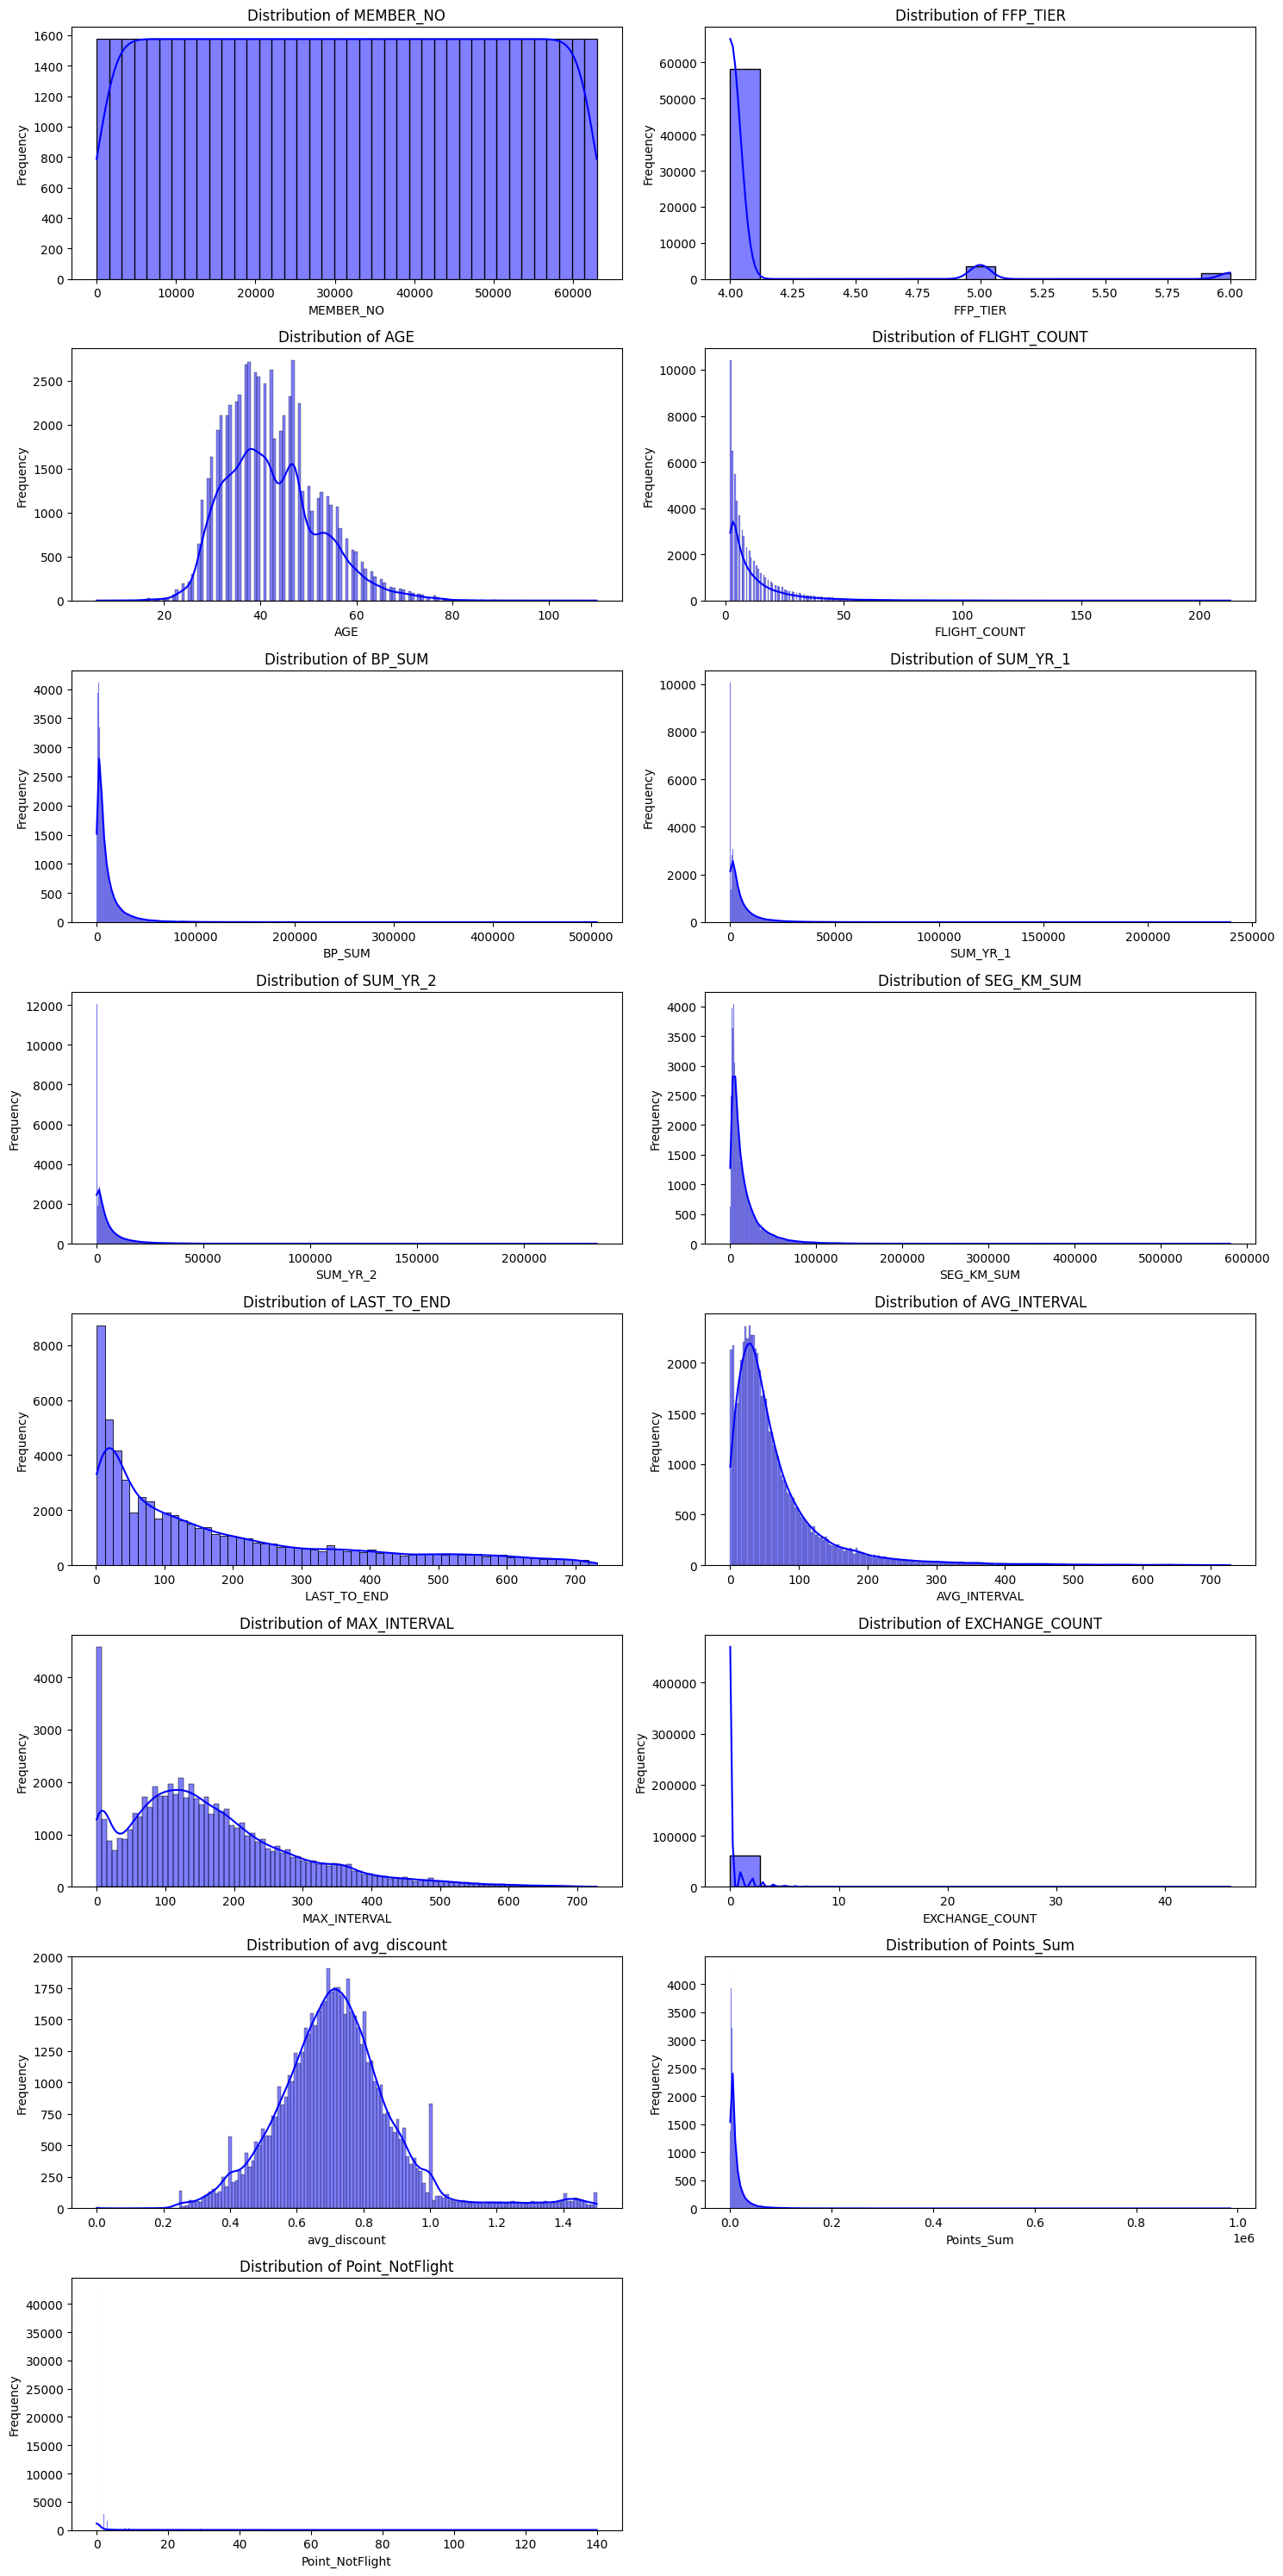

In [8]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols):
    plt.subplot(8, 2, i+1)
    sns.histplot(df[col], color='blue', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The majority of the columns appear to have a positively skewed distribution, except for the MEMBER_NO, FFP_TIER, and avg_discount columns

In [9]:
categorical_cols

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,3/31/2014
1,2/19/2007,8/3/2007,Male,NaN,beijing,CN,3/31/2014,3/25/2014
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,3/21/2014
3,8/22/2008,8/23/2008,Male,Los Angeles,CA,US,3/31/2014,12/26/2013
4,4/10/2009,4/15/2009,Male,guiyang,guizhou,CN,3/31/2014,3/27/2014
...,...,...,...,...,...,...,...,...
62983,5/20/2011,6/5/2013,Female,guangzhou,guangdong,CN,3/31/2014,6/9/2013
62984,3/8/2010,9/14/2013,Male,foshan,guangdong,CN,3/31/2014,1/3/2014
62985,3/30/2006,12/2/2006,Female,guangzhou,guangdong,CN,3/31/2014,3/3/2014
62986,2/6/2013,2/14/2013,Female,guangzhou,guangdong,CN,3/31/2014,2/26/2013


In [10]:
categorical_cols.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


From the data above, most of the customers included in this flight data joined in early 2011, made their first flight in mid-2013, the majority are men, work in Guangzhou, Guangdong province, China, and the latest loading data includes information up to March 2014.

### Univariate Analysis

Demographic Segmentation

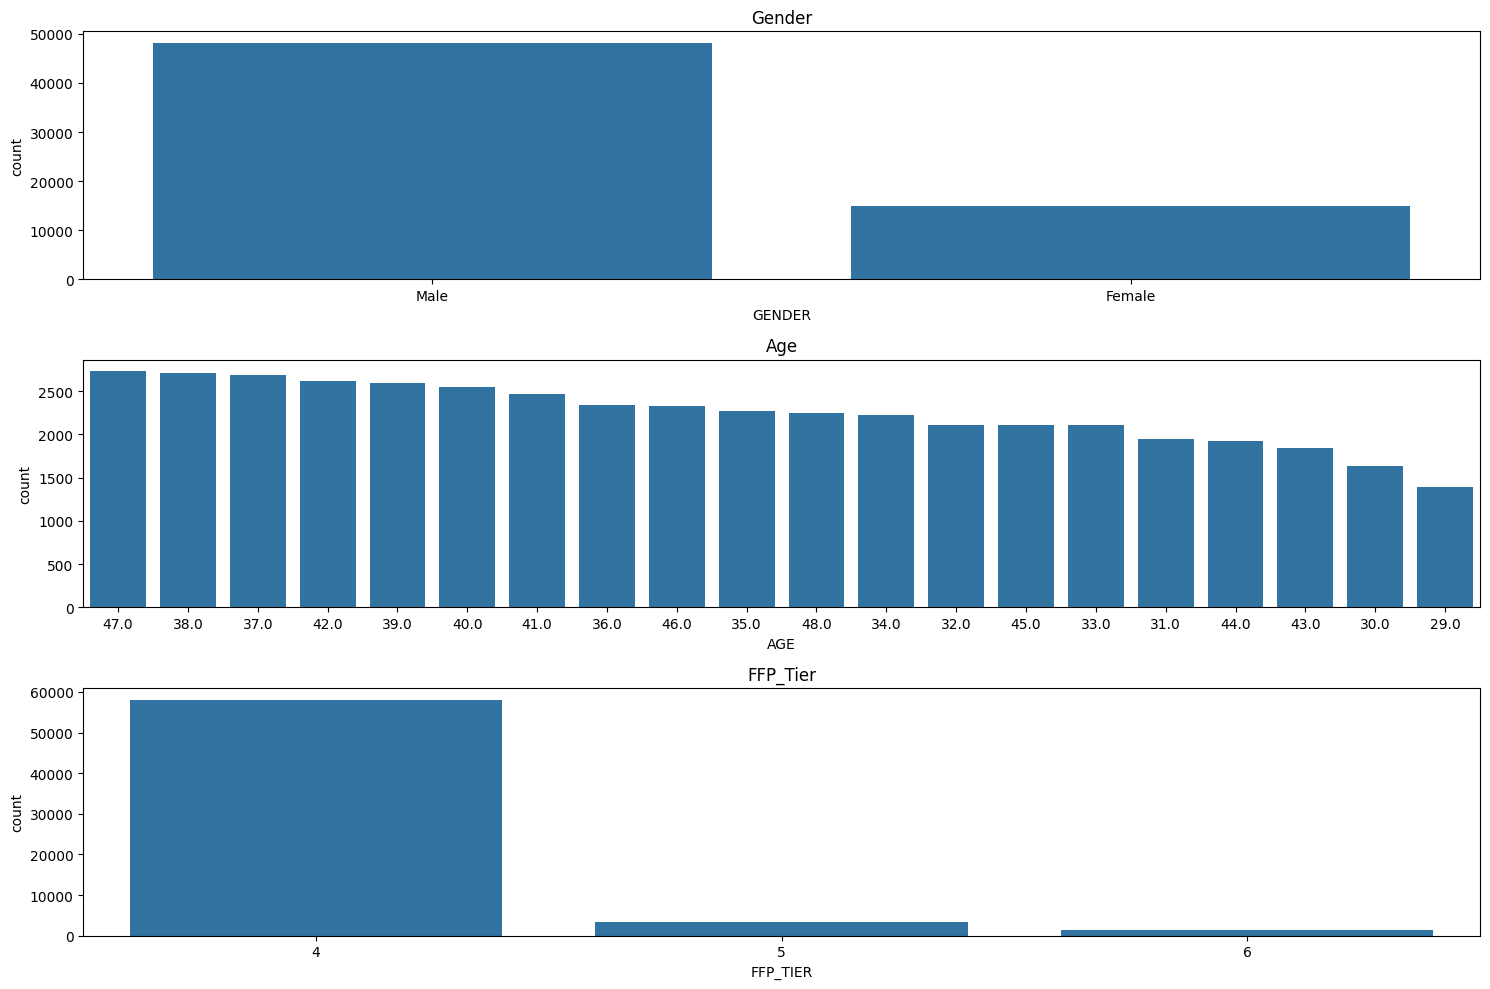

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.countplot(data=df, x='GENDER', order=df['GENDER'].value_counts().index[:20])
plt.title("Gender")

plt.subplot(3, 1, 2)
sns.countplot(data=df, x='AGE', order=df['AGE'].value_counts().index[:20])
plt.title("Age")

plt.subplot(3, 1, 3)
sns.countplot(data=df, x='FFP_TIER', order=df['FFP_TIER'].value_counts().index[:20])
plt.title("FFP_Tier")

plt.tight_layout()

plt.show()


First, the distribution of the number of customers based on gender shows that the number of male customers is greater than female. Second, in terms of frequent flyer program tiers (FFP_TIER), tier 4 is the tier that most customers have.

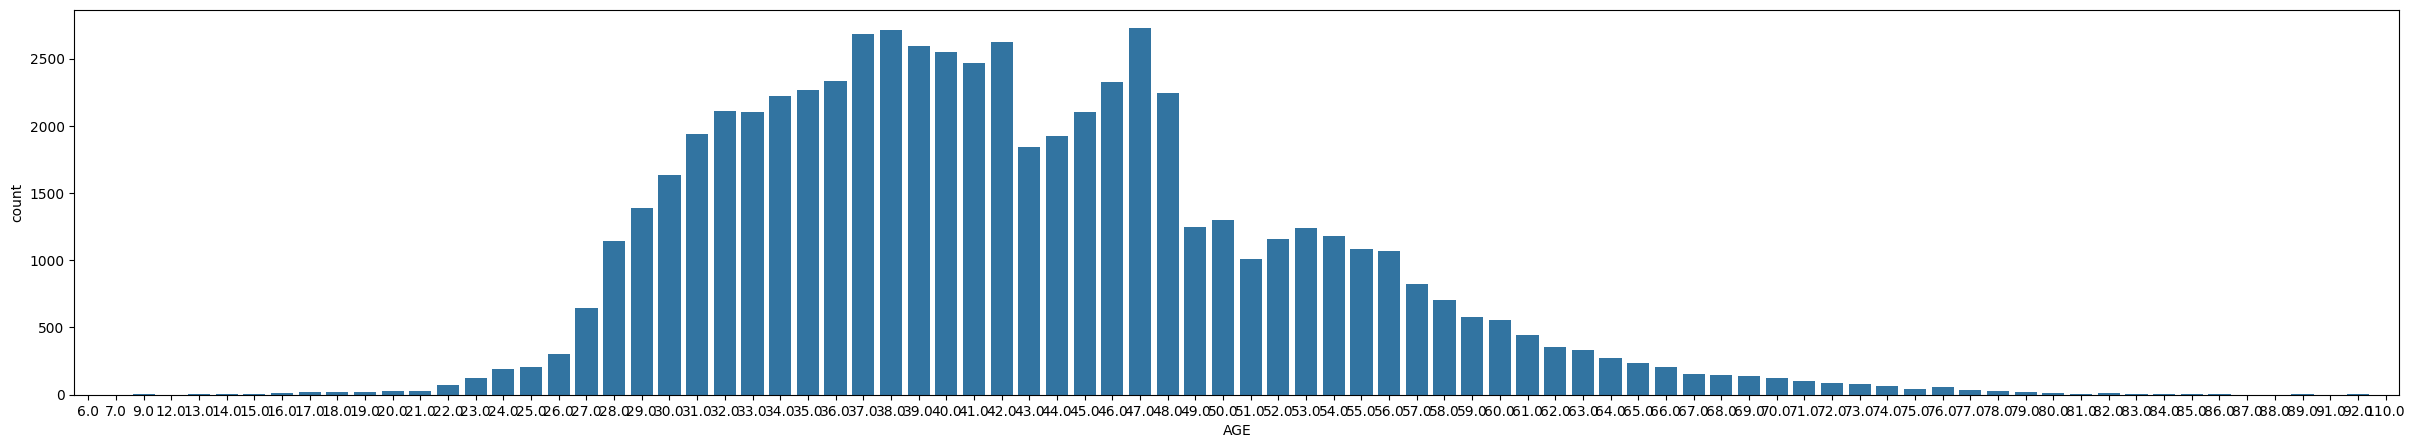

In [12]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="AGE", data=df)

Many business trips are made by customers aged 27-55 years and the majority of customers are around 47 years old.

Geografis Segmentation

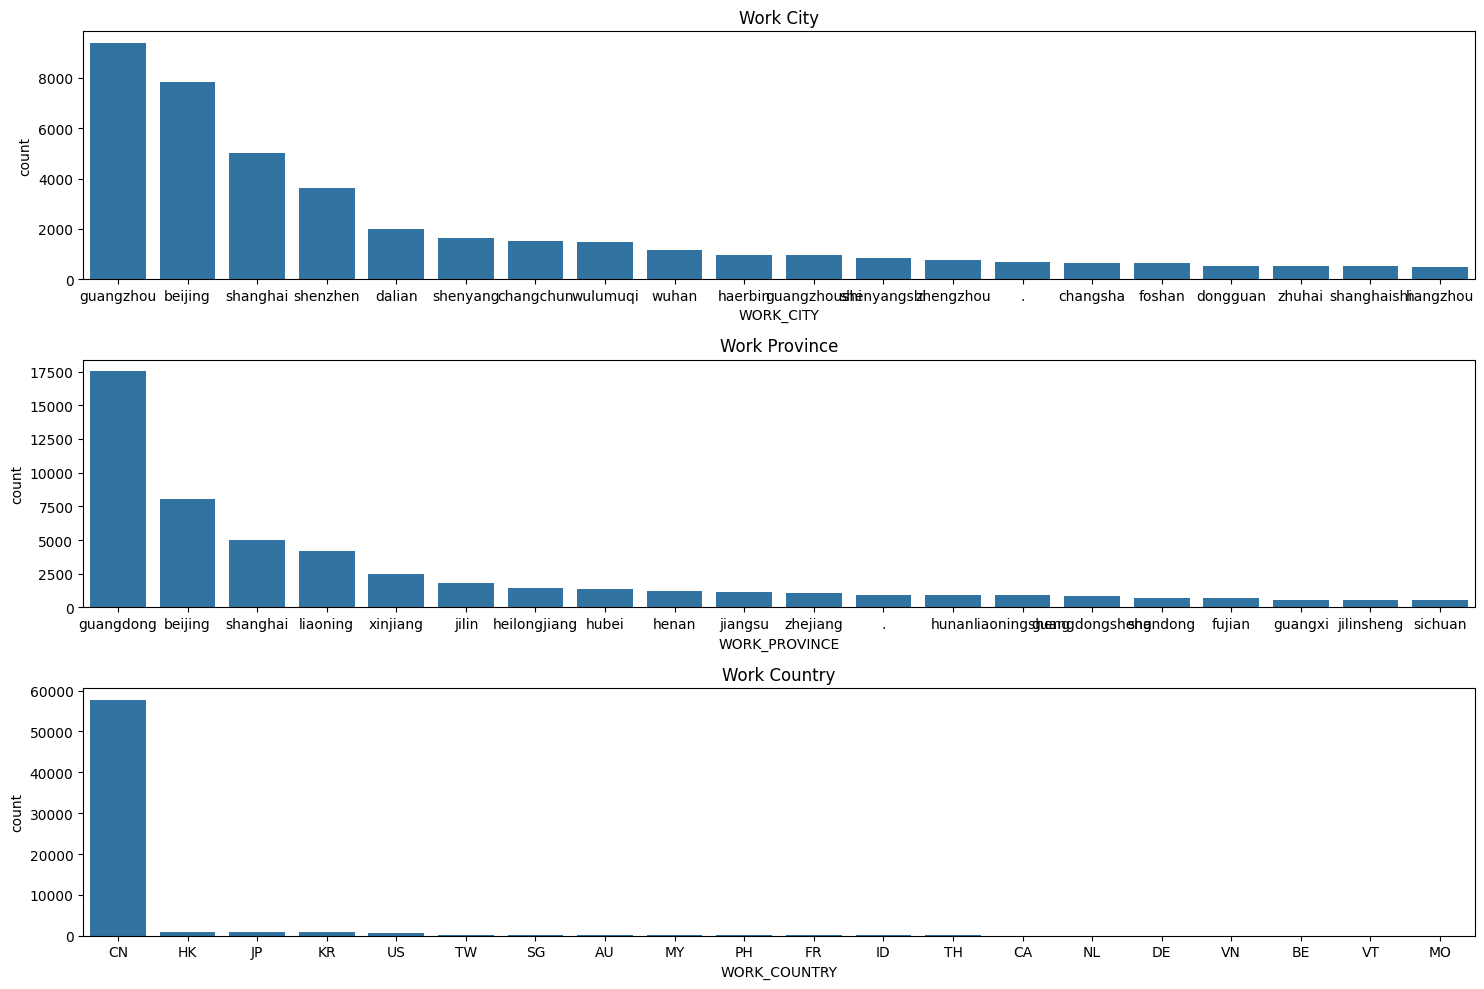

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.countplot(data=df, x='WORK_CITY', order=df['WORK_CITY'].value_counts().index[:20])
plt.title("Work City")

plt.subplot(3, 1, 2)
sns.countplot(data=df, x='WORK_PROVINCE', order=df['WORK_PROVINCE'].value_counts().index[:20])
plt.title("Work Province")

plt.subplot(3, 1, 3)
sns.countplot(data=df, x='WORK_COUNTRY', order=df['WORK_COUNTRY'].value_counts().index[:20])
plt.title("Work Country")

plt.tight_layout()

plt.show()


The distribution of the number of customers based on work city shows that most customers come from Guangzhou. Furthermore, when looking at the distribution of work provinces, Guangdong is the province with the largest number of customers, indicating that this region dominates in customer attraction. Finally, at the work country level, it can be seen that the majority of customers come from China, indicating a strong focus on domestic market share.

In [14]:
# plt.figure(figsize=(15, 10))

# plt.subplot(3, 1, 2)
# ax2 = sns.countplot(data=df, x='LAST_TO_END', order=df['LAST_TO_END'].value_counts().index[:20])
# ax2.set_title("Last_To_End")

# ax1.bar_width = 0.4  
# ax2.bar_width = 0.4 

# plt.tight_layout()
# plt.show()

Behavioral Segmentation

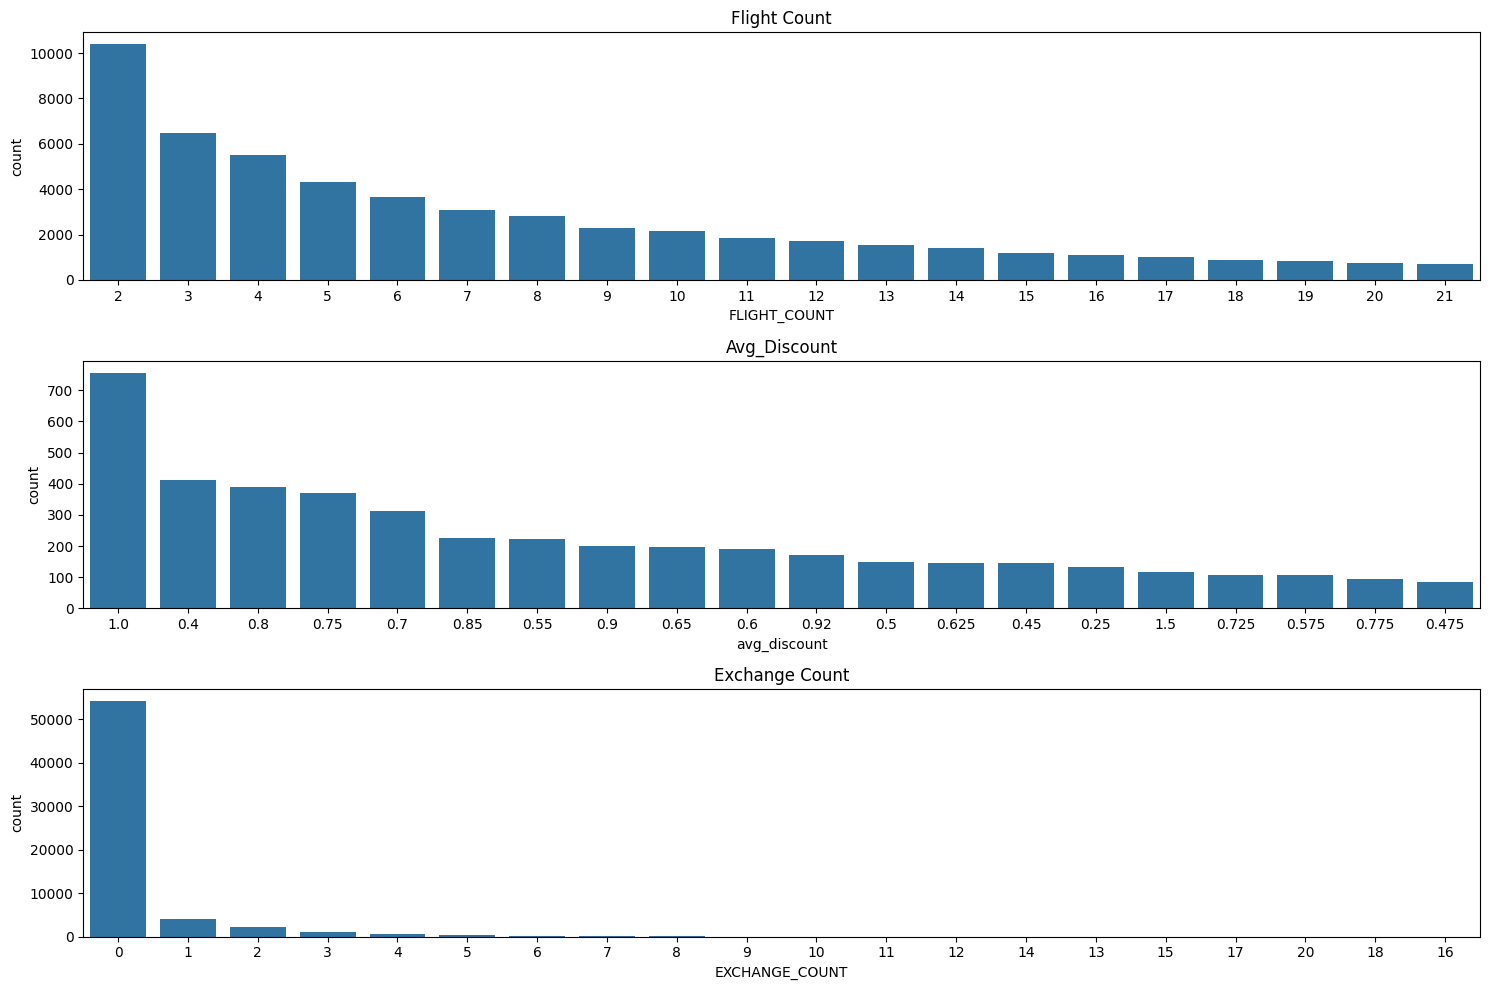

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.countplot(data=df, x='FLIGHT_COUNT', order=df['FLIGHT_COUNT'].value_counts().index[:20])
plt.title("Flight Count")

plt.subplot(3, 1, 2)
sns.countplot(data=df, x='avg_discount', order=df['avg_discount'].value_counts().index[:20])
plt.title("Avg_Discount")

plt.subplot(3, 1, 3)
sns.countplot(data=df, x='EXCHANGE_COUNT', order=df['EXCHANGE_COUNT'].value_counts().index[:20])
plt.title("Exchange Count")

plt.tight_layout()

plt.show()


### Bivariate Analysis

In [16]:
df.groupby('avg_discount').agg(Frequency=('Points_Sum', 'count')).reset_index().sort_values('Frequency', ascending=False).head(10)

,avg_discount,Frequency
51571,1.00,757
1025,0.40,413
40071,0.80,391
33205,0.75,370
25168,0.70,311
45167,0.85,225
7061,0.55,224
48363,0.90,199
17621,0.65,197
11465,0.60,191


There are 757 entries with an average discount value of 1.00, which is the highest discount value that appears most frequently in the data.

In [17]:
df.groupby('FFP_TIER').agg(Transaction=('WORK_CITY', 'count')).reset_index().sort_values('Transaction', ascending=False).head(10)

,FFP_TIER,Transaction
0,4,55955
1,5,3305
2,6,1459


From the results above, it can be seen that the FFP_TIER 4 membership level has the highest number of transactions or entries, followed by FFP_TIER 5 and 6

In [18]:
df.groupby('SEG_KM_SUM').agg(Frequency=('EXCHANGE_COUNT', 'count')).reset_index().sort_values('Frequency', ascending=False).head(10)

,SEG_KM_SUM,Frequency
2429,3934,298
2639,4154,181
1200,2616,179
155,1298,145
94,1158,117
17895,24464,100
1288,2710,99
4094,5684,91
1321,2748,89
3846,5420,87


A flight distance of 3934 kilometers had the highest transaction frequency, perhaps indicating that this distance is common for customers.

### Assignment 3 : Feature Egnineering



In [19]:
df.shape

(62988, 23)

In [20]:
df.duplicated().sum()

0

### Handle Missing Value

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing = percent_missing.round(3)  
missing_value = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value)


                   percent_missing
MEMBER_NO                    0.000
FFP_DATE                     0.000
FIRST_FLIGHT_DATE            0.000
GENDER                       0.005
FFP_TIER                     0.000
WORK_CITY                    3.602
WORK_PROVINCE                5.157
WORK_COUNTRY                 0.041
AGE                          0.667
LOAD_TIME                    0.000
FLIGHT_COUNT                 0.000
BP_SUM                       0.000
SUM_YR_1                     0.875
SUM_YR_2                     0.219
SEG_KM_SUM                   0.000
LAST_FLIGHT_DATE             0.000
LAST_TO_END                  0.000
AVG_INTERVAL                 0.000
MAX_INTERVAL                 0.000
EXCHANGE_COUNT               0.000
avg_discount                 0.000
Points_Sum                   0.000
Point_NotFlight              0.000


1. Missing values are found in 7 columns, namely GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2.
2. Next, it will drop the column whose percentage is below 1%

In [22]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df.dropna(subset=[col], inplace=True)

In [23]:
missing_col2 = ['WORK_CITY', 'WORK_PROVINCE']

for col in missing_col2:
    df[col].fillna('None',inplace=True)

In [24]:
percent_missing = df.isnull().sum() 
missing_value = pd.DataFrame({'missing': percent_missing})
print(missing_value)

                   missing
MEMBER_NO                0
FFP_DATE                 0
FIRST_FLIGHT_DATE        0
GENDER                   0
FFP_TIER                 0
WORK_CITY                0
WORK_PROVINCE            0
WORK_COUNTRY             0
AGE                      0
LOAD_TIME                0
FLIGHT_COUNT             0
BP_SUM                   0
SUM_YR_1                 0
SUM_YR_2                 0
SEG_KM_SUM               0
LAST_FLIGHT_DATE         0
LAST_TO_END              0
AVG_INTERVAL             0
MAX_INTERVAL             0
EXCHANGE_COUNT           0
avg_discount             0
Points_Sum               0
Point_NotFlight          0


Before changing the data type, in the Last_Flight_Date column there was an incorrect date at 2014/2/29 0:00:00. So we have to check that column first

In [25]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [26]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


So, now we are dropping the rows because the percentage of incorrect data in `LAST_FLIGHT_DATE` is only 0.007%.

In [27]:
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

### Changing Data Type

Change the data type in the AGE column from float64 to int64

In [28]:
df['AGE'] = df['AGE'].astype(int) 

Change the data type in the FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE columns from object to datetime

In [29]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df[col] = pd.to_datetime(df[col])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  int32         
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM_SUM 

### Assignment 4. RFM dengan K-Means
1. Gunakan kolom 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM'. Tidak perlu mengekstrak data dari kolom tertentu. **Dengan keterangan RFM berikut** :
- Recency (R) = kolom Last_to_end
- Frequency (F) = kolom flight_count
- Monetary (M) = kolom SEG_KM_SUM
2. Pastikan kolom tersebut sudah dilakukan StandarScaller
3. Jika ingin remove outlier silahkan, gunakan IQR saja
4. Gunakan Elbow Method untuk K-Means atau metode Silhouette

In [ ]:
# Recency (R) = kolom Last_to_end
# Frequency (F) = kolom flight_count
# Monetary (M) = kolom SEG_KM_SUM
df_rfm = df[['MEMBER_NO', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']].copy()

df_rfm.set_index('MEMBER_NO', inplace=True)

df_rfm.columns = ['R', 'F', 'M']

print(df_rfm)


             R    F       M
MEMBER_NO                  
54993        1  210  580717
28065        7  140  293678
55106       11  135  283712
21189       97   23  281336
39546        5  152  309928
...        ...  ...     ...
16415      437    2    3848
18375      297    2    1134
36041       89    4    8016
45690       29    2    2594
61027      400    2    3934

[61437 rows x 3 columns]


In [ ]:
df_rfm.head()

,R,F,M
MEMBER_NO,,,
54993,1,210,580717
28065,7,140,293678
55106,11,135,283712
21189,97,23,281336
39546,5,152,309928


In [ ]:
df_rfm.describe()

,R,F,M
count,61437.000000,61437.000000,61437.000000
mean,173.565880,11.939776,17276.042710
std,181.477696,14.118982,21054.585569
min,1.000000,2.000000,368.000000
25%,28.000000,3.000000,4849.000000
50%,107.000000,7.000000,10149.000000
75%,262.000000,15.000000,21431.000000
max,731.000000,213.000000,580717.000000


### outlier


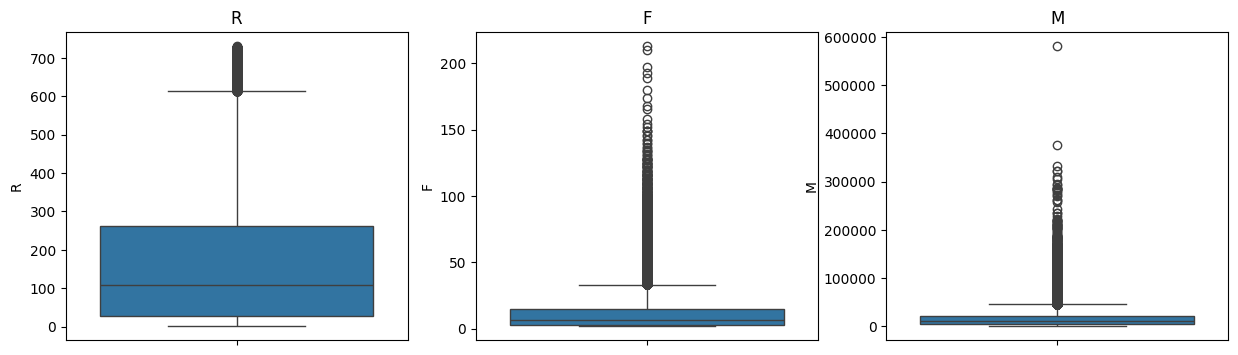

In [ ]:
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_rfm[col])
        plt.title(col)
        i = i+1     
dist_list(RFM)

In [ ]:
cols = ['R', 'F', 'M']

for col in cols:
    Q1 = df_rfm[col].quantile(0.25)
    Q3 = df_rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_rfm[col] = np.where(df_rfm[col] > upper_bound, upper_bound, df_rfm[col])
    df_rfm[col] = np.where(df_rfm[col] < lower_bound, lower_bound, df_rfm[col])


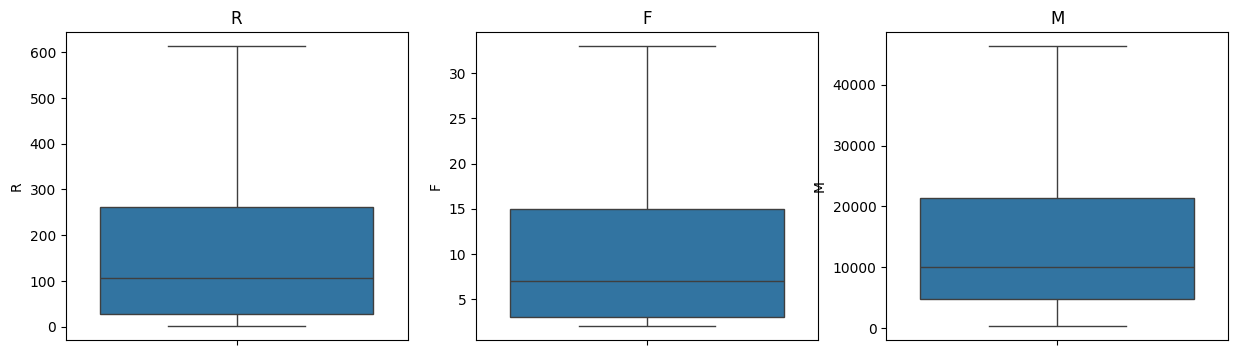

In [ ]:
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_rfm[col])
        plt.title(col)
        i = i+1
        
dist_list(RFM)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_std=df_rfm
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [ ]:
df_std.head()

,R,F,M
MEMBER_NO,,,
54993,0.000000,1.000000,1.0
28065,0.009804,1.000000,1.0
55106,0.016340,1.000000,1.0
21189,0.156863,0.677419,1.0
39546,0.006536,1.000000,1.0


In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 

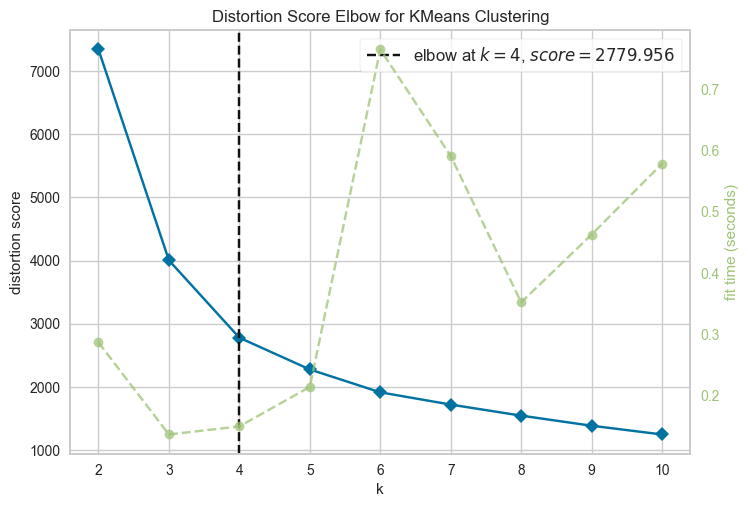

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_elbow = KElbowVisualizer(KMeans(random_state=1000), k=10)
model_elbow.fit(df_std)
model_elbow.show()

From the evaluation using the elbow method, information was obtained that the ideal number of clusters is 4 clusters

In [ ]:
kmeans_model = KMeans(
    n_clusters = 4, 
    random_state=42
)

kmeans_model.fit(df_std) 

KMeans(n_clusters=4, random_state=42)

1. Using the KMeans model with cluster = 4
2. Assign cluster to cluster column

In [ ]:
df_std['cluster_elbow'] = kmeans_model.labels_
df_std

,R,F,M,cluster_elbow
MEMBER_NO,,,,
54993,0.000000,1.000000,1.000000,0
28065,0.009804,1.000000,1.000000,0
55106,0.016340,1.000000,1.000000,0
21189,0.156863,0.677419,1.000000,0
39546,0.006536,1.000000,1.000000,0
...,...,...,...,...
16415,0.712418,0.000000,0.075758,2
18375,0.483660,0.000000,0.016675,2
36041,0.143791,0.064516,0.166493,1


Added a new column called cluster_elbow

Text(0.5, 1.0, 'Total Customer for Each Segment')

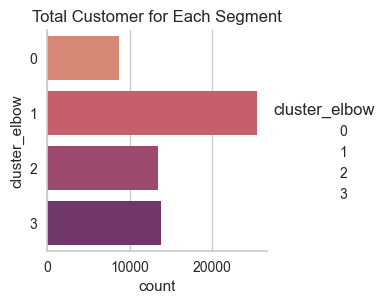

In [ ]:
sns.catplot(
    y = 'cluster_elbow',
    data = df_std,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

By using this plot, you can see the distribution of the number of customers in each previously defined cluster segment.

### Recency VS Frequency

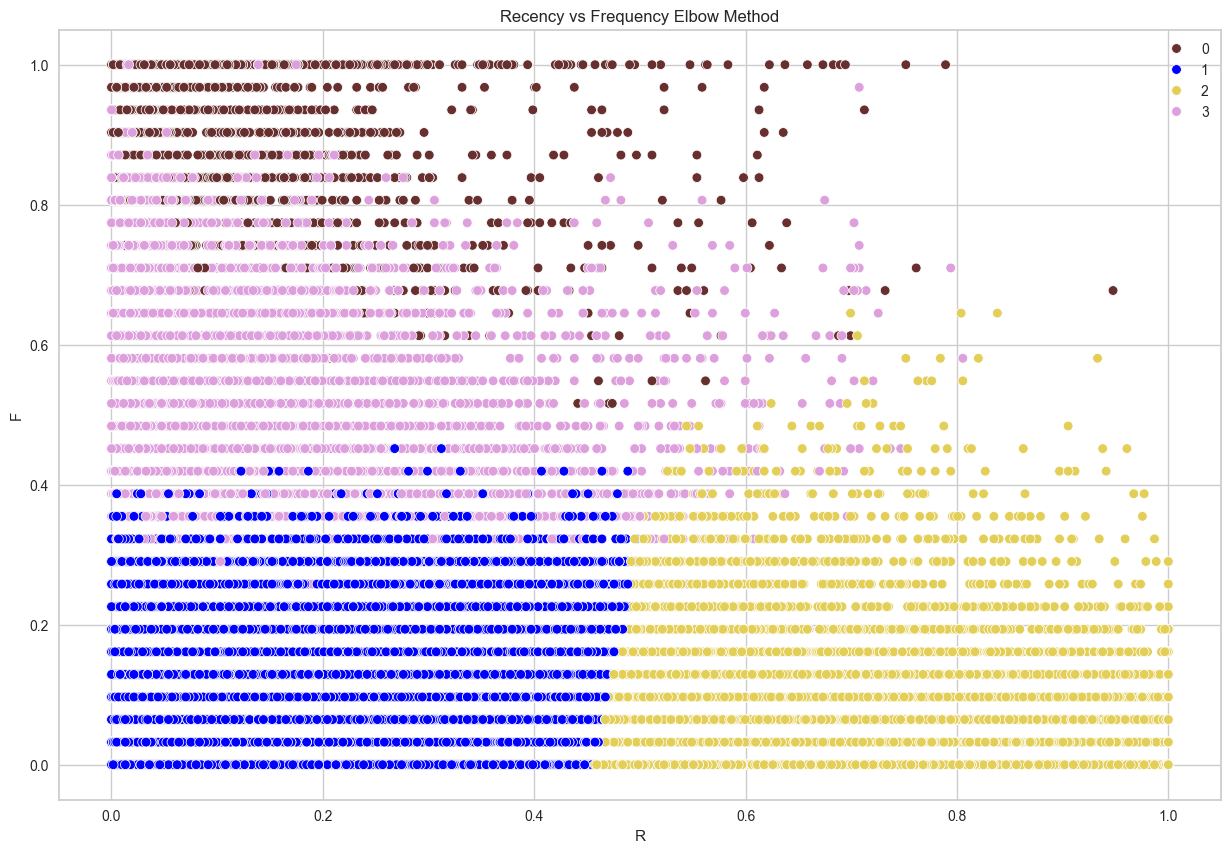

In [ ]:
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = df_std, x = df_std["R"], y = df_std['F'], hue = df_std["cluster_elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

1. Cluster 0 has a recency range of up to 0.8
2. Cluster 1 has a recency range distribution from 0 to 0.4 and a frequency of around 0.4
3. Cluster 2 has a recency range distribution that converges from 0.4 to 1, but frequency has a better range
4. cluster 3 which has a recency range for almost every value and frequency up to 1

### Recency vs Monetary Value

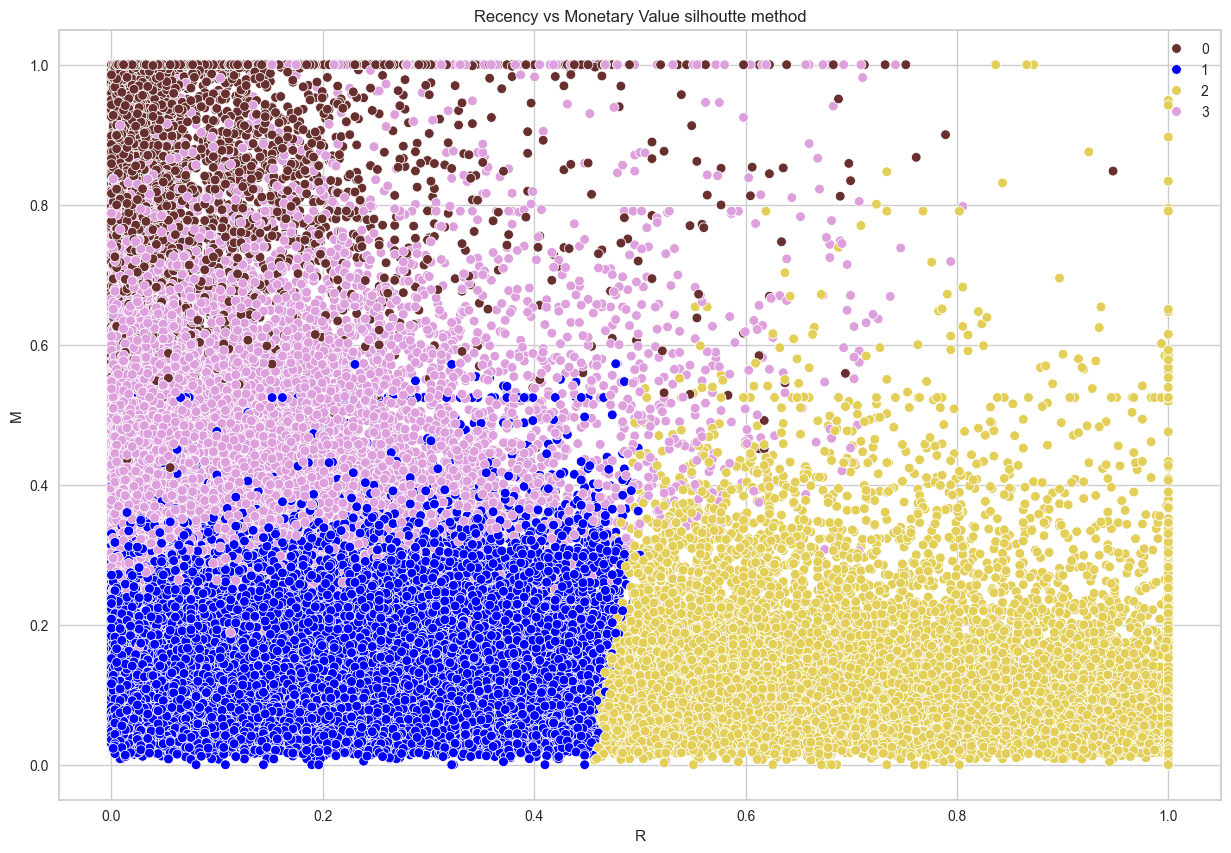

In [ ]:
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = df_std, x = df_std["R"], y = df_std['M'], hue = df_std["cluster_elbow"], palette= pal_elbow)
pl.set_title("Recency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

1. Cluster 1 has a monetary value in the range of almost 0.6, then Recency is in the range of 0.4.
2. Cluster 2 has a monetary value from 0 to 1 but in distribution many of them gather in the range 0 to 0.4 with a frequency condition of 0.4 to 1
3. Cluster 3 has a Recency value in the range of 0.4 to 0.8 with a monetary distribution in the range of 0.3 to 1, but distributionally it converges in the range of 0.3 to 0.6
4. Cluster 0 has a monetary distribution value that ranges from almost 1

### Frequency vs Monetary Value

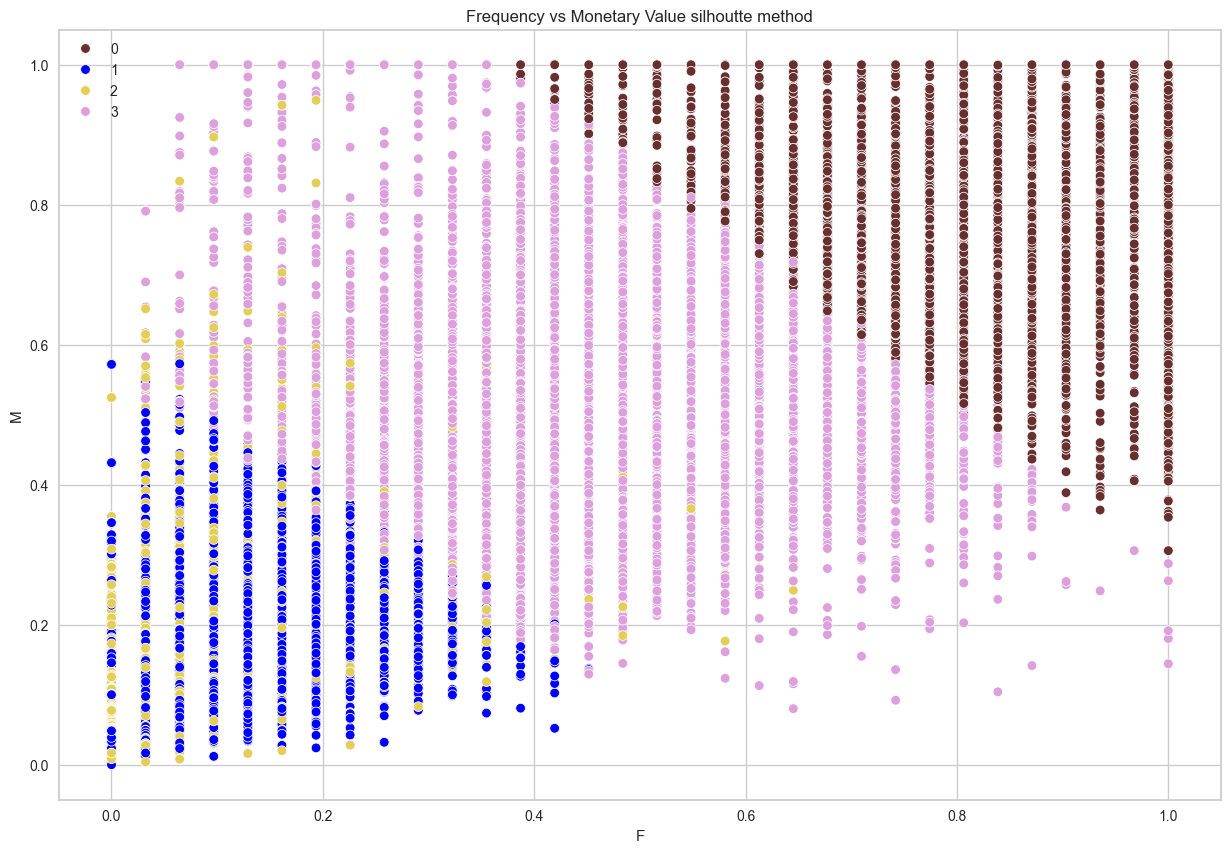

In [ ]:
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = df_std, x = df_std["F"], y = df_std['M'], hue = df_std["cluster_elbow"], palette= pal_elbow)
pl.set_title("Frequency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

1. cluster 0 has a frequency range of 0.3 to 1 and a monetary range of up to 1
2. cluster 1 has a frequency range of up to 0.4 and monetary frequency below 0.6
3. Cluster 2 has a smaller frequency distribution but the monetary range reaches 1 even though the distribution is sparse
4. cluster 3 has a frequency range from 0 to 1 and monetary to 1

### Assignment 5. Insight and Interpretation of RFM results

In [ ]:
df_cluster0 = df_std[df_std['cluster_elbow']==0]
df_cluster1 = df_std[df_std['cluster_elbow']==1]
df_cluster2 = df_std[df_std['cluster_elbow']==2]
df_cluster3 = df_std[df_std['cluster_elbow']==3]

In [ ]:
clusters = [df_cluster0, df_cluster1, df_cluster2, df_cluster3]

selected_columns = ['R', 'F', 'M']

for idx, cluster_df in enumerate(clusters):
    print(f"Describe Cluster {idx} for Selected Columns:")
    print(cluster_df[selected_columns].describe())
    print("\n")

Describe Cluster 0 for Selected Columns:
                 R            F            M
count  8682.000000  8682.000000  8682.000000
mean      0.056963     0.888237     0.892111
std       0.085807     0.147901     0.144325
min       0.000000     0.387097     0.305360
25%       0.008170     0.774194     0.796211
50%       0.024510     1.000000     1.000000
75%       0.065359     1.000000     1.000000
max       0.947712     1.000000     1.000000


Describe Cluster 1 for Selected Columns:
                  R             F             M
count  25442.000000  25442.000000  25442.000000
mean       0.191415      0.108066      0.153701
std        0.134592      0.086561      0.087971
min        0.000000      0.000000      0.000000
25%        0.070261      0.032258      0.082419
50%        0.176471      0.096774      0.141098
75%        0.300654      0.161290      0.213531
max        0.503268      0.451613      0.572797


Describe Cluster 2 for Selected Columns:
                  R             F   

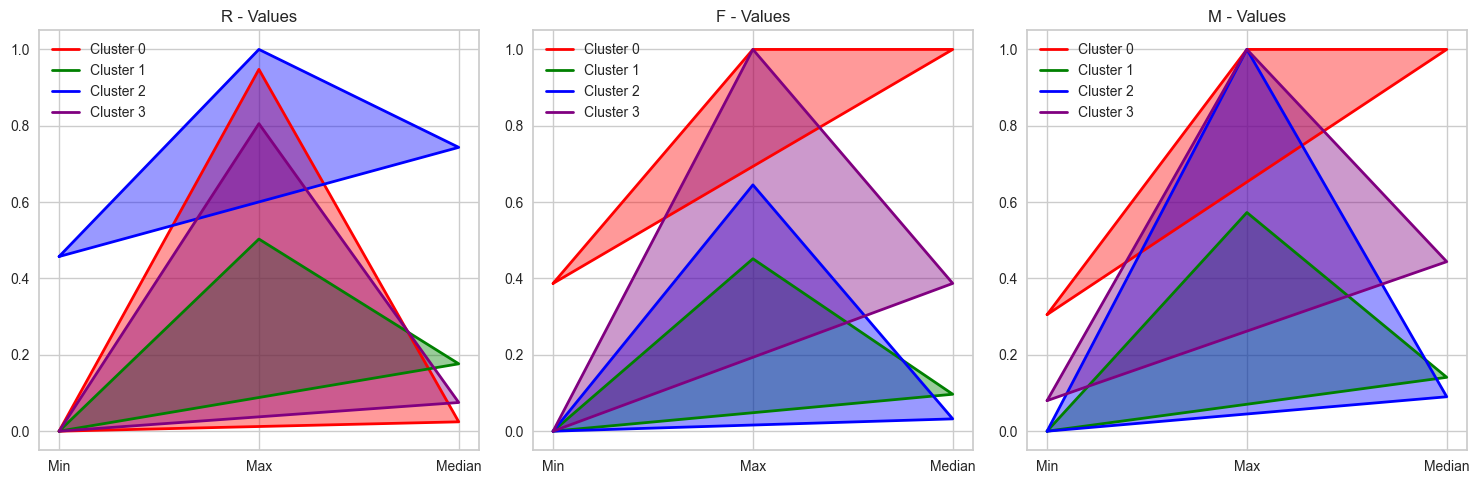

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def radar_plot(ax, values, categories, title, cluster_label, color):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    values += values[:1]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_label}', linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, alpha=0.4, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = ['red', 'green', 'blue', 'purple']

for col_idx, column in enumerate(selected_columns):
    for cluster_idx, cluster_df in enumerate(clusters):
        values = [cluster_df[column].min(), cluster_df[column].max(), cluster_df[column].median()]
        radar_plot(axs[col_idx], values, ['Min', 'Max', 'Median'], f'{column} - Values', cluster_idx, color=colors[cluster_idx])

plt.tight_layout()
plt.show()